# Filtrado de Spam con Naive-Bayes

**Resumen General**
Este Notebook se centra en la construcción, desarrollo e implementación de un modelo de aprendizaje automático utilizando el método de clasificación Naive-Bayes para el filtrado de correos de spam utilizando un data frame de mensajes reales. A través de un enfoque práctico y detallado, el cuaderno guía a los alumnos en el proceso de desarrollo de un modelo predictivo, desde la carga y exploración de datos hasta la evaluación del modelo.

## Pasos en la implementación de Naive-Bayes
* **Procesamiento de los datos**: Involucra todo el procedimiento de limpieza y
transformación de los datos en crudo. Puede incluir reducir el ruido (variabilidad), manejar datos faltantes y normalización de datos.

* **Extracción de características**: Proceso de selección y creación de las características a  partir del data set. En el caso de la clasiciación de textos, las características pueden ser el número de veces que se repiten palabras específicas en una frase.

* **Entrenamiento del Modelo**: En este paso se estiman los parámetros del Naive-Bayes utilizando el conjunto de entrenamiento. Se calculan las probabilidades condicionales requeridas para cada clase.

* **Evaluación del Modelo**: Se evalua la precisión del modelo ante nuevos datos. Las métricas de evaluación estándar incluyen la precisión, accuracy, F1-Score y la matriz de confunsión del modelo




##1 Procesamiento de los datos

### 1.1 Carga fichero CSV desde Drive (No necesario si se trabaja en local)


In [ ]:
# Conexión con drive para obtener el .csv
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


### 1.2 Importación de Librerías

In [1]:
# Importamos las librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### 1.3 Análisis Exploratorio de los Datos

In [2]:
#Carga del data set en pandas
df = pd.read_csv("/home/marco/Clasificaciones y agrupaciones/Naive Bayes/spam.csv")

#Sacamos 15 registros por pantalla para observar nuestros datos
df.head(15)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
#Dimensiones de nuestra base de datos
df.shape

(5572, 2)

Tenemos una base de datos con 5572 observaciones de mensajes de texto clasificados por Spam y No spam ("ham")

In [4]:
#Veamos la distribución de datos en las diferentes clases de nuestro DataSet
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

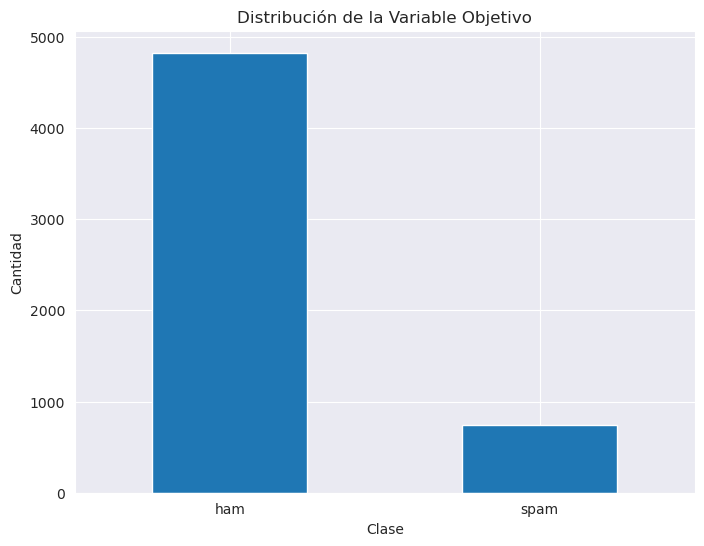

In [5]:
# Distribución del 'Outcome'
# Conteo de las clases en la columna 'Outcome'
outcome_counts = df['Category'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar')
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

##2 Extracción de las características
Nuestra base de datos cuenta con mensajes y su clasificación, pero necesitamos obtener las características (variables) a partir de las cuáles clasificará nuestro modelo.

In [6]:
#Transformamos nuestra variable objetivo de tipo string a numérico
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
y = df['Category'].values

Separamos nuestro dataset entre conjunto de entrenamiento y test antes de transformarlo para obtener las características

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam,test_size=0.25)

Para extraer las características utilizaremos el método CountVectorizer. El objetivo será obtener el número de veces que aparece cada palabra en los mensajes y utilizar esto como variables para predecir si futuros mensajes serán Spam.

La función CountVectorizer coge las palabras únicas como variables
características y pone cada mensaje como una observación. Luego únicamente cuenta el número de veces que aparece cada palabra en el mensaje correspondiente. Veamos un ejemplo de cómo funciona el método. Está sacado de la documentación de la librería sk.learn. Lo puedes encontrar [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

In [9]:
##Ejemplo para ver el funcionamiento del método de extracción de características CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#Tenemos estos cuatro mensajes de los cuáles vamos a extraer las palabras únicas como características
Mensajes=[
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
      'Is this the first document?',
]
vectorizer = CountVectorizer()
w = vectorizer.fit_transform(Mensajes)
#Sacamos las características resultantes
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [10]:
#Array de conteo de palabras por mensaje
print(w.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


Ahora que sabemos cómo funciona el método de extracción de variables, vamos a aplicarlo a nuestro conjunto de entrenamiento que hemos creado anteriormente.

In [11]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5, 7439))

In [12]:
X_train_count.toarray().shape

(4179, 7439)

En nuestro ejemplo real, tendremos una característica por cada palabra existente en todos los mensajes que forman parte del conjunto de entrenamiento. En este caso podemos ver que tenemos un total de 7453 palabras únicas y, por tanto, el mismo número de características.

##3 Entrenamiento del Modelo

Una vez que ya hemos realizado la extracción de las variables con las que vamos a realizar la clasificación, el siguiente paso es determinar el modelo de Naive-Bayes a implementar y entrenarlo con los conjuntos de entrenamiento/prueba definidos anteriormente.

Al tratarse de un problema de filtrado de mensajes SPAM, las características son el número de veces que aparece una palabra por mensaje, es decir, variables discretas. En consecuencia, aplicaremos el modelo Naive-Bayes **Multinomial**, al ser esta la distribución de las características.

Al tener una característica por cada palabra única (7513 en total) es posible que alguna de ellas no tenga aparezca en ningún mensaje para una clase concreta en el conjunto de entrenamiento. Para solucionar esta problemática, conocida como **problema de frecuencia cero**, utilizamos el **suavizamiento de Laplace**. Esto se indica a través del parametro *alpha* al crear el modelo, pero si no indicamos nada por defecto determinará el coeficiente como 1.

In [13]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=1)
model.fit(X_train_count,y_train)

,alpha,1
,force_alpha,True
,fit_prior,True
,class_prior,None


In [14]:
X_test_count = v.transform(X_test)
y_pred=model.predict(X_test_count)
model.score(X_test_count,y_test)

0.990667623833453

Veamos como hace **predicciones** el modelo. Le ponemos dos ejemplos nuevos de e-mails para probar como realiza la clasificación de los mismos:

In [15]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

### 3.1 SKlearn Pipeline

Cómo hemos visto anteriormente, para predecir sobre conjuntos del data set o nuevos emails, hemos de aplicar cada vez la transformación definida con el CountVectorizer. Para esto, existe una herramienta en la librería SKlearn llamada **Pipeline** (nos sirve como atajo). Utilizando esta función, podremos definir la transformación conjuntamente con el modelo predefinido para poder utilizar los datos en crudo sin previa transformación, haciendo que sea más óptimo al escribir el código.

In [16]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

Ahora ya podemos entrenar el modelo y hacer predicciones directamente sobre los datos en crudo (sin transformar).

In [17]:
clf.fit(X_train, y_train)

,steps,"[('vectorizer', ...), ('nb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [18]:
clf.predict(emails)

array([0, 1])

## 4 Evaluación del modelo

In [19]:
# Obtenemos la precisión del entrenamiento. En el caso de algoritmos de clasificación, el método de puntuación representa la precisión.
clf.score(X_test,y_test)

0.990667623833453

### 4.1 Informe de clasificación
Otro informe importante es el de clasificación. Se trata de un resumen de texto de la precisión, el recall y la puntuación F1 para cada clase. Scikit-learn ofrece la posibilidad de calcular el informe de clasificación utilizando el método classification_report.

In [20]:
from sklearn.metrics import classification_report

In [21]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], shape=(1393,))

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1214
           1       0.96      0.97      0.96       179

    accuracy                           0.99      1393
   macro avg       0.98      0.98      0.98      1393
weighted avg       0.99      0.99      0.99      1393





* **Precision:** Mide la precisión de las predicciones positivas. (Porcentaje de predicciones positivas correctas)
* **Recall:** Mide la capacidad del modelo para capturar instancias positivas. (Porcentaje de casos positivos detectados)
* **F1-Score:** Proporciona un equilibrio entre precision y recall.
* **Support:** Muestra la cantidad de instancias reales de cada clase.
* **Accuracy:** Porcentaje de predicciones correctas

### 4.2 Matriz de confusión

Una matriz de confusión es una tabla que se utiliza a menudo para describir el rendimiento de un modelo de clasificación (o "clasificador") en un conjunto de datos de prueba para los que se conocen los valores verdaderos. Scikit-learn ofrece la posibilidad de calcular la matriz de confusión utilizando el método confusion_matrix.

In [23]:
# importamos confusion_matrix
from sklearn.metrics import confusion_matrix

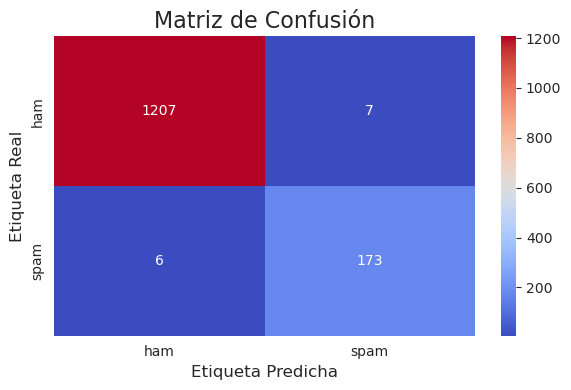

In [24]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Etiquetas personalizadas
class_names = ["ham", "spam"]

# Crear un heatmap con seaborn
plt.figure(figsize=(6, 4))
ax = sns.heatmap(
    cm,
    annot=True,             # Mostrar valores dentro de las celdas
    fmt="d",                # Mostrar números enteros
    cmap="coolwarm",        # Paleta de colores
    xticklabels=class_names,  # Etiquetas personalizadas para el eje X
    yticklabels=class_names   # Etiquetas personalizadas para el eje Y
)

# Agregar títulos y etiquetas
ax.set_title("Matriz de Confusión", fontsize=16)
ax.set_xlabel("Etiqueta Predicha", fontsize=12)
ax.set_ylabel("Etiqueta Real", fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [25]:
confusion_matrix(y_test,y_pred)

array([[1207,    7],
       [   6,  173]])

Considerando la matriz de confusión anterior:

Verdadero negativo = 1195

Falso positivo = 4

Falso negativo = 15

Verdadero positivo = 179

Especificidad (Porcentaje de verdaderos negativos)

Recall/Sensibilidad (Porcentaje de casos positivos detectados)

Precisión (Porcentaje de predicciones de positivos correctos)

Accuracy (exactitud, potcentaje de predicciones correctas)

**Precisión:** De los casos en los que nuestro modelo clasificó como positivo, ¿qué porcentaje son realmente positivos?

**Recall (sensibilidad):** De los casos positivos en nuestro propio DataSet, ¿qué porcentaje nuestro modelo los clasificó como positivos?

Si aumentamos la precisión, perderemos recall y viceversa. Hay que interpretar que nos interesa más en nuestro modelo según qué problema estemos modelizando y qué error sea menos costoso. En el caso de un modelo de filtrado de spam, preferimos tener mayor precisión, es decir, menos falsos positivos para no perder información de mensajes que no sean spam y no nos lleguen a la bandeja de correo.

En un caso en el que quisiéramos predecir un fraude bancario, preferiríamos tener más sensibilidad (recall), ya que un falso positivo no sería costoso, pero un falso negativo estaríamos dejando pasar a un defraudador.

En este sentido, es vital siempre interpretar nuestro modelo y evaluarlo según el problema que estemos modelizando.



### 4.3 Curva ROC (Reciever Operating Charecteristic)

Es un gráfico de la tasa de verdaderos positivos frente a la tasa de falsos positivos para los distintos puntos de corte posibles de una prueba diagnóstica.

Una curva ROC demuestra varias cosas:

1) Muestra el compromiso entre sensibilidad y especificidad (cualquier aumento de la sensibilidad irá acompañado de una disminución de la especificidad).

2) Cuanto más se acerque la curva al borde izquierdo y luego al borde superior del espacio ROC, más precisa será la prueba.

3) Cuanto más se acerque la curva a la diagonal de 45 grados del espacio ROC, menos precisa será la prueba.

4) El área bajo la curva es una medida de la precisión de la prueba.

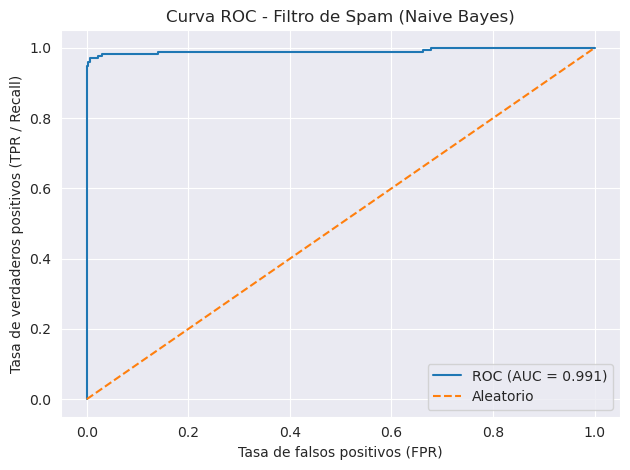

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 1) Probabilidad de la clase positiva
proba = clf.predict_proba(X_test)

# >>> Elige UNA de estas líneas según tus etiquetas:
pos_idx = list(clf.classes_).index(1)          # si las clases son 0 y 1
#pos_idx = list(clf.classes_).index("spam")       # si las clases son "ham" y "spam"

y_score = proba[:, pos_idx]  # score continuo para la clase positiva


# 2) Calcular FPR/TPR y AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)

# 3) Graficar
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Aleatorio")
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR / Recall)")
plt.title("Curva ROC - Filtro de Spam (Naive Bayes)")
plt.legend()
plt.tight_layout()
plt.show()

AUC = 0.988 ⇒ capacidad discriminativa excelente. Interpretación probabilística: hay ≈98.8% de probabilidad de que el modelo asigne un score mayor a un correo spam que a uno ham elegido al azar.

La curva sube casi vertical junto al eje Y: significa que con FPR muy bajo ya capturas gran parte de los positivos (alta sensibilidad/recall). La línea discontinua es el clasificador aleatorio (AUC=0.5); tu modelo está muy por encima.

A ojo del gráfico:

Con FPR ≈ 1–2%, el TPR ronda 0.90–0.95.

Con FPR ≈ 5%, el TPR se acerca a 0.96–0.98.

Para exprimir hasta TPR ≈ 1.0, la curva se hace casi horizontal: ganar ese último 1–2% de recall dispara los falsos positivos.

### 4.3 Curva PR (Precision Recall)

Es un gráfico de la precisión frente al recall para el score de un clasificador binario

Una curva PR demuestra varias cosas:

1) Compromiso precisión-recall. Aumentar el recall (capturar más positivos) suele implicar reducir la precisión (aumentan los falsos positivos entre las predicciones positivas).

2) Cuanto más se acerque la curva a la esquina superior-derecha (precision≈1 y recall≈1), más eficaz es la prueba. Una curva alta a lo largo de amplios rangos de recall indica que el modelo mantiene alta pureza de positivos incluso cuando intenta recuperarlos casi todos.

3) La línea base no es 0.5, sino la prevalencia de la clase positiva. Una curva próxima a esa horizontal indica una prueba poco informativa; estar muy por encima de esa línea indica capacidad de concentración de verdaderos positivos con pocos falsos positivos.

4) El área bajo la curva PR (Average Precision, AP) mide la calidad global del ranking para la clase positiva. Valores próximos a 1 indican excelente desempeño; cuanto mayor el AP, mejor mantiene la precisión al incrementar el recall.

Nota: La PR es especialmente informativa en clases desbalanceadas, donde la ROC puede parecer optimista.

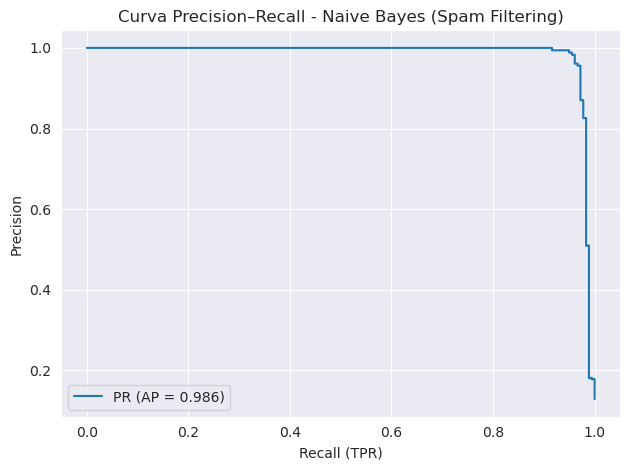

In [28]:
# Curva Precision–Recall
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1) Probabilidad de la clase positiva
proba = clf.predict_proba(X_test)

# >>> Elige UNA de estas líneas según tus etiquetas:
pos_idx = list(clf.classes_).index(1)          # si las clases son 0 y 1
#pos_idx = list(clf.classes_).index("spam")       # si las clases son "ham" y "spam"

y_score = proba[:, pos_idx]  # score continuo para la clase positiva

# 2) Curva PR y Average Precision
precision, recall, _ = precision_recall_curve(y_test, y_score)
ap = average_precision_score(y_test, y_score)

# 3) Gráfico
plt.figure()
plt.plot(recall, precision, label=f"PR (AP = {ap:.3f})")
plt.xlabel("Recall (TPR)")
plt.ylabel("Precision")
plt.title("Curva Precision–Recall - Naive Bayes (Spam Filtering)")
plt.legend()
plt.tight_layout()
plt.show()

AP (Average Precoision) = 0.971 → desempeño excelente. El modelo mantiene una precisión muy alta a lo largo de casi todo el rango de recall. En términos prácticos, a medida que “abres” el umbral para capturar más spam, los falsos positivos permanecen muy bajos durante gran parte del recorrido.

La curva se mantiene casi plana en precisión≈1 hasta ~0.85–0.90 de recall.
⇒ Puedes recuperar ~85–90% del spam con una precisión prácticamente perfecta (casi todo lo que marcas como spam es realmente spam).

A partir de ahí, al empujar el recall por encima de ~0.90, la precisión empieza a caer (aparecen más FP).
⇒ Zona de trade-off: ganas cobertura, pero comienzas a contaminar el buzón de spam con algún ham.

Cerca de recall → 1.0, la precisión cae de forma acusada y se aproxima a la línea base (la prevalencia de la clase positiva en el conjunto de test).
⇒ Para capturar el último 1–2% de spam, el coste en FP se dispara (comportamiento esperado).

Comparada con la línea base (prevalencia), tu curva está muy por encima en todo el rango relevante → el clasificador concentra verdaderos positivos con muy poca “contaminación” durante la mayor parte del espectro.

**Ejercico para el lector interesado**. Es posible forzar un umbral de precisión y de recall. ¿Cómo lo programaríamos? ¿Nos interesa en este caso?